In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
book = pd.read_csv(r'C:\Users\dell\Desktop\Internship\FinalData.csv')

In [3]:
book.head()

,book_id,authors,title,Genres
0,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama
1,2,"J.K. Rowling, Mary GrandPré",Harry Potter and the Sorcerer's Stone (Harry P...,Fantasy;Young-Age
2,3,Stephenie Meyer,"Twilight (Twilight, #1)",Fantasy
3,4,Harper Lee,To Kill a Mockingbird,Self-Help;Drama
4,5,F. Scott Fitzgerald,The Great Gatsby,Drama


In [4]:
rating = pd.read_csv(r'C:\Users\dell\Desktop\Internship\ratings.csv')

In [5]:
rating.head()

,user_id,book_id,rating
0,1,258,5
1,2,260,5
2,2,26,4
3,2,315,3
4,2,33,4


In [6]:
avg_rating = pd.read_csv(r'C:\Users\dell\Desktop\Internship\AverageRatings.csv')
avg_rating.head()

,book_id,rating
0,1,4.279707
1,2,4.351350
2,3,3.214341
3,4,4.329369
4,5,3.772224


In [7]:
rating_count = pd.read_csv(r'C:\Users\dell\Desktop\Internship\RatingsCount.csv')
rating_count.head()

,book_id,rating
0,1,22806
1,2,21850
2,3,16931
3,4,19088
4,5,16604


In [8]:
book.dtypes

book_id     int64
authors    object
title      object
Genres     object
dtype: object

In [9]:
rating.dtypes

user_id    int64
book_id    int64
rating     int64
dtype: object

In [10]:
book_data = pd.merge(book, rating, on='book_id')

In [11]:
book_data.head()

,book_id,authors,title,Genres,user_id,rating
0,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,2886,5
1,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,6158,5
2,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,3991,4
3,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,5281,5
4,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,5721,5


In [12]:
final_data = pd.merge(book_data,rating_count, on='book_id')
final_data.head()

,book_id,authors,title,Genres,user_id,rating_x,rating_y
0,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,2886,5,22806
1,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,6158,5,22806
2,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,3991,4,22806
3,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,5281,5,22806
4,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,5721,5,22806


In [13]:
final_data.rename(columns={'rating_x':'rating','rating_y':'rating_count'}, inplace=True)

In [14]:
final_data.head()

,book_id,authors,title,Genres,user_id,rating,rating_count
0,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,2886,5,22806
1,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,6158,5,22806
2,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,3991,4,22806
3,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,5281,5,22806
4,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,5721,5,22806


In [15]:
book_rating = pd.merge(final_data,avg_rating, on='book_id')
book_rating.head()

,book_id,authors,title,Genres,user_id,rating_x,rating_count,rating_y
0,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,2886,5,22806,4.279707
1,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,6158,5,22806,4.279707
2,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,3991,4,22806,4.279707
3,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,5281,5,22806,4.279707
4,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,5721,5,22806,4.279707


In [16]:
book_rating.rename(columns={'rating_x':'rating','rating_y':'avg_rating'}, inplace=True)
book_rating.head()

,book_id,authors,title,Genres,user_id,rating,rating_count,avg_rating
0,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,2886,5,22806,4.279707
1,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,6158,5,22806,4.279707
2,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,3991,4,22806,4.279707
3,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,5281,5,22806,4.279707
4,1,Suzanne Collins,"The Hunger Games (The Hunger Games, #1)",SciFi;Drama,5721,5,22806,4.279707


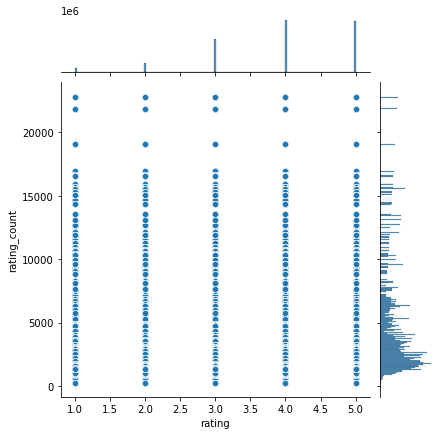

In [17]:
#Now plotting the JointPlot
sns.jointplot(x='rating',y='rating_count',data=book_rating)

In [18]:
# Creating user item interaction matrix
book_matrix = book_rating.pivot_table(index='user_id',columns='title',values='rating')

In [19]:
book_matrix.head()

title,11/22/63,1776,1984,1Q84,"1st to Die (Women's Murder Club, #1)","2001: A Space Odyssey (Space Odyssey, #1)",A Beautiful Mind,A Bend in the Road,A Brief History of Time,"A Child Called ""It"" (Dave Pelzer #1)",...,Wonder,"Wool Omnibus (Silo, #1)","Words of Radiance (The Stormlight Archive, #2)",World War Z: An Oral History of the Zombie War,"World Without End (The Kingsbridge Series, #2)",Wuthering Heights,"Xenocide (Ender's Saga, #3)",Year of Wonders,Yes Please,Zen and the Art of Motorcycle Maintenance: An Inquiry Into Values
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#calculating mean (rating count for every book)
mean_rating = pd.DataFrame(book_rating.groupby(['title'])['rating_count'].mean())
mean_rating

,rating_count
title,
11/22/63,3737.0
1776,1274.0
1984,14693.0
1Q84,1563.0
"1st to Die (Women's Murder Club, #1)",2019.0
...,...
Wuthering Heights,9584.0
"Xenocide (Ender's Saga, #3)",1742.0
Year of Wonders,1445.0


In [21]:
#most rated books so sorting the rating values
mean_rating.sort_values('rating_count', ascending=False).head(10)

,rating_count
title,
"The Hunger Games (The Hunger Games, #1)",22806.0
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",21850.0
To Kill a Mockingbird,19088.0
"Twilight (Twilight, #1)",16931.0
The Great Gatsby,16604.0
"Catching Fire (The Hunger Games, #2)",16549.0
"Mockingjay (The Hunger Games, #3)",15953.0
"Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)",15855.0
"Harry Potter and the Chamber of Secrets (Harry Potter, #2)",15657.0


## Making Recommendation for a sample book ex: Twilight

In [22]:
#now fetching rating for this particular book
twilight_rating = book_matrix['Twilight (Twilight, #1)']

In [23]:
twilight_rating

user_id
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
        ... 
53420    3.0
53421    NaN
53422    NaN
53423    NaN
53424    4.0
Name: Twilight (Twilight, #1), Length: 53417, dtype: float64

In [24]:
#Now Finding correlation with similar books
similar_to_twilight= book_matrix.corrwith(twilight_rating)
similar_to_twilight.head(10)

title
11/22/63                                     0.156385
1776                                        -0.039835
1984                                        -0.043483
1Q84                                         0.122192
1st to Die (Women's Murder Club, #1)         0.302374
2001: A Space Odyssey (Space Odyssey, #1)    0.091769
A Beautiful Mind                             0.073375
A Bend in the Road                           0.284276
A Brief History of Time                      0.077447
A Child Called "It" (Dave Pelzer #1)         0.280092
dtype: float64

In [25]:
#creating a dataframe for correlation to bring in with no. of ratings
corr_twilight = pd.DataFrame(similar_to_twilight,columns=['Correlation'])
corr_twilight.dropna(inplace=True)
corr_twilight.head()

,Correlation
title,
11/22/63,0.156385
1776,-0.039835
1984,-0.043483
1Q84,0.122192
"1st to Die (Women's Murder Club, #1)",0.302374


In [26]:
#now joining with ratings
#corr_twilight.sort_values('Correlation', ascending= False).head(10)
corr_twilight = corr_twilight.join(mean_rating['rating_count'])

In [27]:
corr_twilight.head(20)

,Correlation,rating_count
title,,
11/22/63,0.156385,3737.000000
1776,-0.039835,1274.000000
1984,-0.043483,14693.000000
1Q84,0.122192,1563.000000
"1st to Die (Women's Murder Club, #1)",0.302374,2019.000000
"2001: A Space Odyssey (Space Odyssey, #1)",0.091769,2253.000000
A Beautiful Mind,0.073375,621.000000
A Bend in the Road,0.284276,1152.000000
A Brief History of Time,0.077447,1845.000000


In [29]:
#books which receives atleast 100 ratings
result = corr_twilight[corr_twilight['rating_count']>100].sort_values('Correlation', ascending= False).head(4)
result

,Correlation,rating_count
title,,
"Twilight (Twilight, #1)",1.000000,16931.0
"The Twilight Saga (Twilight, #1-4)",0.893485,932.0
"Eclipse (Twilight, #3)",0.831682,9620.0
"New Moon (Twilight, #2)",0.815995,9712.0


## Content based Filtering

In [29]:
corr_twilight.dtypes

Correlation     float64
rating_count    float64
dtype: object

In [30]:
book_rating.dtypes

book_id           int64
authors          object
title            object
Genres           object
user_id           int64
rating            int64
rating_count      int64
avg_rating      float64
dtype: object

In [31]:
corr_twilight['Correlation'] = corr_twilight.Correlation.astype(str)

In [32]:
corr_twilight['rating_count'] = corr_twilight.rating_count.astype(str)

In [33]:
corr_twilight = corr_twilight.join(book_rating['Genres'])

In [34]:
corr_twilight.head()

,Correlation,rating_count,Genres
title,,,
11/22/63,0.1563845833590855,3737.0,NaN
1776,-0.03983464182669371,1274.0,NaN
1984,-0.04348324473820006,14693.0,NaN
1Q84,0.12219169326664442,1563.0,NaN
"1st to Die (Women's Murder Club, #1)",0.3023738074867795,2019.0,NaN


In [35]:
corr_twilight.drop('Genres',axis=1,inplace=True)

In [30]:
test = pd.merge(result,book_rating, on='title')

In [31]:
test.head()

,title,Correlation,rating_count_x,book_id,authors,Genres,user_id,rating,rating_count_y,avg_rating
0,"Twilight (Twilight, #1)",1.0,16931.0,3,Stephenie Meyer,Fantasy,451,5,16931,3.214341
1,"Twilight (Twilight, #1)",1.0,16931.0,3,Stephenie Meyer,Fantasy,899,3,16931,3.214341
2,"Twilight (Twilight, #1)",1.0,16931.0,3,Stephenie Meyer,Fantasy,975,4,16931,3.214341
3,"Twilight (Twilight, #1)",1.0,16931.0,3,Stephenie Meyer,Fantasy,1052,3,16931,3.214341
4,"Twilight (Twilight, #1)",1.0,16931.0,3,Stephenie Meyer,Fantasy,1143,5,16931,3.214341


In [32]:
test['Genres'] = test.Genres.str.split(';')
test.head()

,title,Correlation,rating_count_x,book_id,authors,Genres,user_id,rating,rating_count_y,avg_rating
0,"Twilight (Twilight, #1)",1.0,16931.0,3,Stephenie Meyer,[Fantasy],451,5,16931,3.214341
1,"Twilight (Twilight, #1)",1.0,16931.0,3,Stephenie Meyer,[Fantasy],899,3,16931,3.214341
2,"Twilight (Twilight, #1)",1.0,16931.0,3,Stephenie Meyer,[Fantasy],975,4,16931,3.214341
3,"Twilight (Twilight, #1)",1.0,16931.0,3,Stephenie Meyer,[Fantasy],1052,3,16931,3.214341
4,"Twilight (Twilight, #1)",1.0,16931.0,3,Stephenie Meyer,[Fantasy],1143,5,16931,3.214341


In [33]:
#test.drop(test.iloc[:, :3], inplace = True, axis = 1)
test = test.drop('authors',1).drop('user_id',1).drop('rating',1).drop('rating_count_y',1).drop('avg_rating',1)

C:\Users\dell\AppData\Local\Temp/ipykernel_1860/280798119.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test = test.drop('authors',1).drop('user_id',1).drop('rating',1).drop('rating_count_y',1).drop('avg_rating',1)


In [34]:
test.head()

,title,Correlation,rating_count_x,book_id,Genres
0,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy]
1,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy]
2,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy]
3,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy]
4,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy]


In [35]:
#Copying the dataframe into a new one since genre info. is not needed in future implementation
book_copy = test.copy()

In [36]:
test.shape

(37195, 5)

In [37]:
#now iterating thru the list of genres and placing 1 into corresponding movies list
for index, row in test.iterrows():
    for genre in row['Genres']:
        book_copy.at[index,genre] = 1

In [38]:
#Filling nan values with 0
book_copy = book_copy.fillna(0)
book_copy.head()

,title,Correlation,rating_count_x,book_id,Genres,Fantasy,Young-Age,Romance
0,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy],1.0,0.0,0.0
1,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy],1.0,0.0,0.0
2,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy],1.0,0.0,0.0
3,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy],1.0,0.0,0.0
4,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy],1.0,0.0,0.0


In [39]:
# taking user input to recommend books to
user_input = [{'title':'Twilight (Twilight, #1)','rating':5},
             {'title':'The Hunger Games (The Hunger Games, #1)','rating':4},
             {'title':'11/22/63','rating':3},
             {'title':'The Great Gatsby','rating':4},
             {'title':'The Fault in Our Stars','rating':2}]
inputbook= pd.DataFrame(user_input)
inputbook

,title,rating
0,"Twilight (Twilight, #1)",5
1,"The Hunger Games (The Hunger Games, #1)",4
2,11/22/63,3
3,The Great Gatsby,4
4,The Fault in Our Stars,2


In [40]:
# add bookid to input user
#filtering books by title
inputid=test[test['title'].isin(inputbook['title'].tolist())]
inputid

,title,Correlation,rating_count_x,book_id,Genres
0,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy]
1,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy]
2,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy]
3,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy]
4,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy]
...,...,...,...,...,...
16926,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy]
16927,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy]
16928,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy]
16929,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy]


In [41]:
#then merging it to get book id
inputbook = pd.merge(inputid,inputbook)
inputbook

,title,Correlation,rating_count_x,book_id,Genres,rating
0,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy],5
1,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy],5
2,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy],5
3,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy],5
4,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy],5
...,...,...,...,...,...,...
16926,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy],5
16927,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy],5
16928,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy],5
16929,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy],5


In [68]:
#dropping genre from the dataframe
inputbook = inputbook.drop('Genres',1)
inputbook

C:\Users\dell\AppData\Local\Temp/ipykernel_7592/1815832891.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  inputbook = inputbook.drop('Genres',1)


,title,Correlation,rating_count_x,book_id,rating
0,11/22/63,0.1563845833590855,3737.0,295,3
1,11/22/63,0.1563845833590855,3737.0,295,3
2,11/22/63,0.1563845833590855,3737.0,295,3
3,11/22/63,0.1563845833590855,3737.0,295,3
4,11/22/63,0.1563845833590855,3737.0,295,3
...,...,...,...,...,...
71337,"Twilight (Twilight, #1)",1.0,16931.0,3,5
71338,"Twilight (Twilight, #1)",1.0,16931.0,3,5
71339,"Twilight (Twilight, #1)",1.0,16931.0,3,5
71340,"Twilight (Twilight, #1)",1.0,16931.0,3,5


## Getting genre table for user movies

In [42]:
#filtering out the books from the input
userbook = book_copy[book_copy['book_id'].isin(inputbook['book_id'].tolist())]
userbook

,title,Correlation,rating_count_x,book_id,Genres,Fantasy,Young-Age,Romance
0,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy],1.0,0.0,0.0
1,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy],1.0,0.0,0.0
2,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy],1.0,0.0,0.0
3,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy],1.0,0.0,0.0
4,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy],1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
16926,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy],1.0,0.0,0.0
16927,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy],1.0,0.0,0.0
16928,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy],1.0,0.0,0.0
16929,"Twilight (Twilight, #1)",1.0,16931.0,3,[Fantasy],1.0,0.0,0.0


In [45]:
#Resetting the index
userbook = userbook.reset_index(drop=True)

#dropping all the columns except the diff genres
userGenreTable =userbook.drop('Correlation',1).drop('rating_count_x',1).drop('book_id',1).drop('title',1).drop('Genres',1)
userGenreTable

C:\Users\dell\AppData\Local\Temp/ipykernel_1860/1661818638.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  userGenreTable =userbook.drop('Correlation',1).drop('rating_count_x',1).drop('book_id',1).drop('title',1).drop('Genres',1)


,Fantasy,Young-Age,Romance
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
16926,1.0,0.0,0.0
16927,1.0,0.0,0.0
16928,1.0,0.0,0.0
16929,1.0,0.0,0.0


### From the input preference, will see the inference, by turning each genre into weights which will be done by mutliplying input ratings to input genre table

In [46]:
inputbook['rating']

0        5
1        5
2        5
3        5
4        5
        ..
16926    5
16927    5
16928    5
16929    5
16930    5
Name: rating, Length: 16931, dtype: int64

In [47]:
#dot product to get weights
userProfile = userGenreTable.transpose().dot(inputbook['rating'])
userProfile

Fantasy      84655.0
Young-Age        0.0
Romance          0.0
dtype: float64

### As the weights are there for every of the user's preference now we can recommend movies accordingly

In [48]:
#getting genres of every book in original dataframe
genre_table = book_copy.set_index(book_copy['book_id'])

#dropping all other columns
genre_table = genre_table.drop('book_id',1).drop('title',1).drop('Genres',1).drop('Correlation',1).drop('rating_count_x',1)
genre_table.head()

C:\Users\dell\AppData\Local\Temp/ipykernel_1860/2574166721.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  genre_table = genre_table.drop('book_id',1).drop('title',1).drop('Genres',1).drop('Correlation',1).drop('rating_count_x',1)


,Fantasy,Young-Age,Romance
book_id,,,
3,1.0,0.0,0.0
3,1.0,0.0,0.0
3,1.0,0.0,0.0
3,1.0,0.0,0.0
3,1.0,0.0,0.0


In [49]:
genre_table.shape

(37195, 3)

In [50]:
#Multiplying the genre by the weights and then taking mean
recommender = ((genre_table*userProfile).sum(axis=1))/(userProfile.sum())
recommender.head()

book_id
3    1.0
3    1.0
3    1.0
3    1.0
3    1.0
dtype: float64

In [51]:
#Sort recommendation
recommender = recommender.sort_values(ascending=False)
recommender.head()

book_id
3     1.0
52    1.0
52    1.0
52    1.0
52    1.0
dtype: float64

In [80]:
#the Final Recommendation
test.loc[test['book_id'].isin(recommender.head(10).keys())]

,title,Correlation,rating_count_x,book_id,Genres
219176,"American Gods (American Gods, #1)",-0.004680048389631664,5681.0,167,"[Fantasy, Drama]"
219177,"American Gods (American Gods, #1)",-0.004680048389631664,5681.0,167,"[Fantasy, Drama]"
219178,"American Gods (American Gods, #1)",-0.004680048389631664,5681.0,167,"[Fantasy, Drama]"
219179,"American Gods (American Gods, #1)",-0.004680048389631664,5681.0,167,"[Fantasy, Drama]"
219180,"American Gods (American Gods, #1)",-0.004680048389631664,5681.0,167,"[Fantasy, Drama]"
...,...,...,...,...,...
888437,Gulliver's Travels,0.09980905461171688,2848.0,529,"[Kids, Fantasy, Fiction, Drama]"
888438,Gulliver's Travels,0.09980905461171688,2848.0,529,"[Kids, Fantasy, Fiction, Drama]"
888439,Gulliver's Travels,0.09980905461171688,2848.0,529,"[Kids, Fantasy, Fiction, Drama]"
888440,Gulliver's Travels,0.09980905461171688,2848.0,529,"[Kids, Fantasy, Fiction, Drama]"
